This notebook will be used for the Capstone Project for IBM's Professional Certificate

In [1]:
!pip install requests
!pip install html5lib
!pip install bs4
!pip install geocoder

In [2]:
import pandas as pd
import requests

In [3]:
#Data from https://statisticalatlas.com/place/Texas/Lubbock/Household-Income and originally from US Census
data = {
    'Neighborhood': ['Regal Park', 'Raintree', 'Westchester', 'Preston Smith','Kings Park', 'Northridge', 'University Pines', 'Waters', 'Shadow Hills', 'Remington Park', 'Heart of Lubbock', 'Slaton-Bean','Harwell', 'Southgate', 'Parkway and Cherry Point', 'Windmill','Jackson-Mahon','Dunbar-Manhattan-Heights','South Overton', 'North Overton'],
    'MedianIncome': [125700, 76500, 74100, 63900,61900,55700,55500,52200,51900,50900,31900,31000,30900,30500,30300,27000,24600,24000,20700,10900],
    'Latitude': [33.5151, 33.509, 33.5631098, 33.5124939,33.5249782,33.5850798,33.5124219,33.5243939,33.5995858,33.5319014,33.5705811,33.5705439,33.5560439,33.5234799,33.600002,33.587298,33.5995434,33.55852,33.581094,33.5883984],
    'Longitude': [-101.9434, -101.892, -101.8952527, -101.9354271,-101.905953,-101.947851,-101.8832574,-101.8833208,-101.952846,-101.9317848,-101.8672609,-101.8500209,-101.8443205,-101.8357699,-101.8224484,-101.8131978,-101.8664719,-101.8274019,-101.8674714,-101.8673533
]}
dfLubbockData = pd.DataFrame(data, columns=['Neighborhood','MedianIncome','Latitude','Longitude'])
dfLubbockData.head()

,Neighborhood,MedianIncome,Latitude,Longitude
0,Regal Park,125700,33.515100,-101.943400
1,Raintree,76500,33.509000,-101.892000
2,Westchester,74100,33.563110,-101.895253
3,Preston Smith,63900,33.512494,-101.935427
4,Kings Park,61900,33.524978,-101.905953


In [4]:
!pip install numpy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip uninstall pandas --yes
!pip install pandas==1.0.5

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')


 

Solving environment: done

# All requested packages already installed.

Found existing installation: pandas 1.0.5
Uninstalling pandas-1.0.5:
  Successfully uninstalled pandas-1.0.5
  Using cached pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
Libraries imported.


In [6]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [7]:
address = 'Lubbock, Texas, United States'
geolocator = Nominatim(user_agent="lbb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lubbock are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_lbb = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, MedianIncome, neighborhood in zip(dfLubbockData['Latitude'], dfLubbockData['Longitude'], dfLubbockData['MedianIncome'], dfLubbockData['Neighborhood']):
    label = '{}, {}'.format(neighborhood, MedianIncome)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lbb)  
    
map_lbb

The geograpical coordinate of Lubbock are 33.5635206, -101.879336.


In [8]:

CLIENT_ID = 'K4AVNJ02ZGXDGFLY4X5WCKYCNUKVP05H51POSJ3KPYM41D5X' # your Foursquare ID
CLIENT_SECRET = 'Z1H5EW0YLFIKNNYC0T2G43ND3CLHQ1NIWNY4SAYVDY0YFFIX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

neighborhood_latitude = dfLubbockData.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dfLubbockData.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dfLubbockData.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

Your credentails:
CLIENT_ID: K4AVNJ02ZGXDGFLY4X5WCKYCNUKVP05H51POSJ3KPYM41D5X
CLIENT_SECRET:Z1H5EW0YLFIKNNYC0T2G43ND3CLHQ1NIWNY4SAYVDY0YFFIX
Latitude and longitude values of Regal Park are 33.5151, -101.9434.


,name,categories,lat,lng
0,Yamagata,Asian Restaurant,33.519114,-101.943592
1,Chili Dog Cafe,Hot Dog Joint,33.518958,-101.943113
2,Domino's Pizza,Pizza Place,33.519106,-101.941200
3,Papa John's Pizza,Pizza Place,33.518969,-101.943627
4,Great Nails And Spa,Cosmetics Shop,33.518887,-101.943627


In [9]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Yamagata,Asian Restaurant,33.519114,-101.943592
1,Chili Dog Cafe,Hot Dog Joint,33.518958,-101.943113
2,Domino's Pizza,Pizza Place,33.519106,-101.941200
3,Papa John's Pizza,Pizza Place,33.518969,-101.943627
4,Great Nails And Spa,Cosmetics Shop,33.518887,-101.943627


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Lubbock_venues = getNearbyVenues(names=dfLubbockData['Neighborhood'],
                                   latitudes=dfLubbockData['Latitude'],
                                   longitudes=dfLubbockData['Longitude']
                                  )
Lubbock_venues.groupby('Neighborhood').count()
dfLubbockData.count()


Neighborhood    20
MedianIncome    20
Latitude        20
Longitude       20
dtype: int64

In [12]:
# one hot encoding
Lubbock_onehot = pd.get_dummies(Lubbock_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Lubbock_onehot['Neighborhood'] = Lubbock_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Lubbock_onehot.columns[-1]] + list(Lubbock_onehot.columns[:-1])
Lubbock_onehot = Lubbock_onehot[fixed_columns]

Lubbock_onehot.head()

Lubbock_grouped = Lubbock_onehot.groupby('Neighborhood').mean().reset_index()

In [13]:
num_top_venues = 3

for hood in Lubbock_grouped['Neighborhood']:
    temp = Lubbock_grouped[Lubbock_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Lubbock_grouped['Neighborhood']

for ind in np.arange(Lubbock_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lubbock_grouped.iloc[ind, :], num_top_venues)


    

In [70]:
dfIncomeCat = ['Low','Low','Low','High','Low','High','High','High','High','High','High','Low','Low','High','High','High','Low']

neighborhoods_venues_sorted['Income'] = dfIncomeCat

isLowIncome = (neighborhoods_venues_sorted['Income'] =='Low')
dfLowIncome = neighborhoods_venues_sorted[isLowIncome]

isHighIncome = (neighborhoods_venues_sorted['Income'] =='High')
dfHighIncome = neighborhoods_venues_sorted[isHighIncome]

In [81]:
LowFeatures = []
HighFeatures = []

for x in dfLowIncome['1st Most Common Venue']:
    LowFeatures.append(x)
for x in dfLowIncome['2nd Most Common Venue']:
    LowFeatures.append(x)
for x in dfLowIncome['3rd Most Common Venue']:
    LowFeatures.append(x)
dfLI1 = pd.DataFrame(LowFeatures, columns=['Venues'])    


for x in dfHighIncome['1st Most Common Venue']:
    HighFeatures.append(x)
for x in dfHighIncome['2nd Most Common Venue']:
    HighFeatures.append(x)
for x in dfHighIncome['3rd Most Common Venue']:
    HighFeatures.append(x)
dfHI1 = pd.DataFrame(HighFeatures, columns=['Venues'])    




<AxesSubplot:>

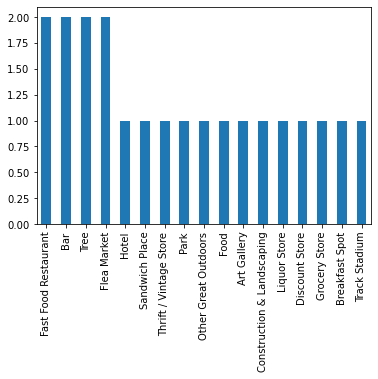

In [82]:
dfLI1['Venues'].value_counts().plot(kind='bar')

<AxesSubplot:>

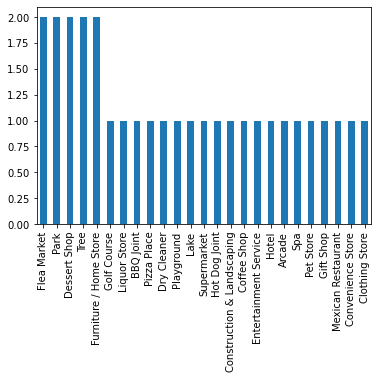

In [83]:
dfHI1['Venues'].value_counts().plot(kind='bar')

In [ ]:
# set number of clusters
kclusters = 3

Lubbock_grouped_clustering = Lubbock_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Lubbock_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:4] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Lubbock_merged = dfLubbockData

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Lubbock_merged = Lubbock_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Lubbock_merged.head() # check the last columns!

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [ ]:
Lubbock_merged.loc[Lubbock_merged['Cluster Labels'] == 0, Lubbock_merged.columns[[1] + list(range(5, Lubbock_merged.shape[1]))]]